# Marvel Comic Characters

## Variable	Definition

page_id = identifier for characters page with the wikia

name 

urlslug = url that takes you to character within the wikia

id = identity status of a character

align = if the cahracter is good, bad, or neutral

eye 

hair

sex

gsm = if the character is a gender or sexual minority

appearances

first_appearance 

year

In [12]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.style.use("tableau-colorblind10")

In [13]:
#details of imported pandas package 

print("Package name:", pd.__name__)
print("Version:", pd.__version__)
print("Path name:", pd.__path__)

Package name: pandas
Version: 1.0.1
Path name: ['/Applications/anaconda3/lib/python3.7/site-packages/pandas']


## Import data

In [14]:
#import new data, use time to see how long it takes to download data
%time df=pd.read_csv('../Marvel_Fun/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv')
df.head()

CPU times: user 59.5 ms, sys: 12.5 ms, total: 72 ms
Wall time: 91.2 ms


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Let's Clean Data

In [15]:
#change the naming convention of the features
df.columns=[i.replace(' ', '_').lower() for i in df.columns]

In [16]:
#use a function to visualize the data

def data_brief(df):
    d_type = df.dtypes
    columns = pd.DataFrame(df.columns, d_type, columns = ['Features:']) #columns
    
    print(f'\nDataTypes:', columns)
    print(f'\nNum of Features:', len(df.columns))
    print(f'\nNum of Rows:', df.shape)
    print(f'\nIndex:', df.index.name)
    
    return

data_brief(df)    


DataTypes:                 Features:
int64             page_id
object               name
object            urlslug
object                 id
object              align
object                eye
object               hair
object                sex
object                gsm
object              alive
float64       appearances
object   first_appearance
float64              year

Num of Features: 13

Num of Rows: (16376, 13)

Index: None


Most of the data is categorical.  I'll use this information when making the statistical function to further inspect the data.

### Inspect basic statistics of the data

I prefer to create a function to analyze the data.  Usually, this function would be filled with heavy statistical information, but this data is mostly categorical. 

In [17]:
def df_analysis(df):
    eda_df = {} #create an open df
    eda_df['count'] = df.count()
    eda_df['null ct'] = df.isnull().sum()
    eda_df['null %'] = df.isnull().mean()
    
    return pd.DataFrame(eda_df)

df_analysis(df)

,count,null ct,null %
page_id,16376,0,0.000000
name,16376,0,0.000000
urlslug,16376,0,0.000000
id,12606,3770,0.230215
align,13564,2812,0.171715
eye,6609,9767,0.596422
hair,12112,4264,0.260381
sex,15522,854,0.052149
gsm,90,16286,0.994504
alive,16373,3,0.000183


Going to drop some columns that I think are pointless in where I'm going with my analysis.  Also, I seem to have quite a bit of of null data in the eye category, which is a problem because I plan to do some work it.  To be honest, I'll probably drop it, I can't fill in the categories without doing more research.

I want to drop the nulls now, but what if the character is interesting and I want explore it later?  This is why I prefer to have separate dataframes.  I do think this practice is frowned upon, but I like it for now.

In [18]:
df2 = df.drop(['page_id', 'urlslug', 'gsm'], axis = 1)

In [19]:
df2.dropna(inplace = True)

In [20]:
df2.sample(6)

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year
2476,Evan Swann (Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,14.0,Dec-88,1988.0
1408,Gary Gilbert (Earth-616),Secret Identity,Bad Characters,Brown Eyes,Brown Hair,Male Characters,Deceased Characters,26.0,Jul-70,1970.0
7328,Aquon (Microverse) (Earth-616),No Dual Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Deceased Characters,3.0,Jun-81,1981.0
822,Claire Temple (Earth-616),No Dual Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Living Characters,45.0,Aug-72,1972.0
7815,Dimitri Fortunov (Earth-616),Public Identity,Good Characters,Brown Eyes,Red Hair,Male Characters,Living Characters,3.0,Feb-97,1997.0
296,Peter Wisdom (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,140.0,Feb-95,1995.0


Just came up with a new way of handling the null data.  What if I look at the appearances?  I wouldn't care as much if the character isn't popular enough.  Although, that sounds mighty biased.  

In [21]:
#sort the dataframe by appearance
df2.sort_values('appearances', ascending = False).head(20)

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0
5,Benjamin Grimm (Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,Living Characters,2255.0,Nov-61,1961.0
6,Reed Richards (Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2072.0,Nov-61,1961.0
7,Hulk (Robert Bruce Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2017.0,May-62,1962.0
8,Scott Summers (Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1955.0,Sep-63,1963.0
9,Jonathan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1934.0,Nov-61,1961.0


In [22]:
#what does the data look like now?
df2.shape

(4402, 10)

In [23]:
#count to genders
x = df.groupby('sex')['align'].count().sort_values(ascending = False)
print(x)

sex
Male Characters           9744
Female Characters         3153
Agender Characters          43
Genderfluid Characters       2
Name: align, dtype: int64


In [24]:
y = df2.groupby('sex')['align'].count().sort_values(ascending = False)
print(y)

sex
Male Characters           3049
Female Characters         1337
Agender Characters          14
Genderfluid Characters       2
Name: align, dtype: int64


In [25]:
#what's the difference of values.  Remember df has the null values

gen1 = df.groupby('sex')['align'].count().sort_values(ascending = False)
gen2 = df2.groupby('sex')['align'].count().sort_values(ascending = False)

gen1 - gen2

sex
Male Characters           6695
Female Characters         1816
Agender Characters          29
Genderfluid Characters       0
Name: align, dtype: int64

In [26]:
#let's get the unique values of the df

def unique(col):
    print(col.capitalize(), 'unique values')
    print()
    count = 0
    
    for i in df2[col].unique():
        df2
        count = count + 1
        print(count, i)

unique('sex')

Sex unique values

1 Male Characters
2 Female Characters
3 Genderfluid Characters
4 Agender Characters


In [27]:
df2['sex'].value_counts()

Male Characters           3049
Female Characters         1337
Agender Characters          14
Genderfluid Characters       2
Name: sex, dtype: int64

In [28]:
df2['eye'].value_counts()

Blue Eyes          1448
Brown Eyes         1335
Green Eyes          424
Black Eyes          317
Red Eyes            266
White Eyes          211
Yellow Eyes         148
Grey Eyes            73
Hazel Eyes           52
Variable Eyes        24
Purple Eyes          20
Orange Eyes          19
One Eye              12
Pink Eyes            11
Gold Eyes            10
Violet Eyes           8
Silver Eyes           6
Yellow Eyeballs       4
Amber Eyes            4
Black Eyeballs        3
No Eyes               3
Multiple Eyes         2
Magenta Eyes          2
Name: eye, dtype: int64

In [29]:
#unique hair colors
df2['hair'].value_counts()

Black Hair               1266
Brown Hair                886
Blond Hair                642
No Hair                   442
Bald                      274
White Hair                239
Red Hair                  234
Grey Hair                 169
Green Hair                 54
Auburn Hair                38
Blue Hair                  26
Strawberry Blond Hair      25
Purple Hair                20
Variable Hair              18
Pink Hair                  17
Orange Hair                15
Silver Hair                13
Yellow Hair                 9
Reddish Blond Hair          5
Gold Hair                   5
Magenta Hair                3
Light Brown Hair            2
Name: hair, dtype: int64

In [30]:
#loop thru the Pandas dataframe and access the index of ea row 
#and the content of ea row easily

for index, row in df.head(n=2).iterrows():
    print(index, row)

0 page_id                                    1678
name                  Spider-Man (Peter Parker)
urlslug             \/Spider-Man_(Peter_Parker)
id                              Secret Identity
align                           Good Characters
eye                                  Hazel Eyes
hair                                 Brown Hair
sex                             Male Characters
gsm                                         NaN
alive                         Living Characters
appearances                                4043
first_appearance                         Aug-62
year                                       1962
Name: 0, dtype: object
1 page_id                                          7139
name                  Captain America (Steven Rogers)
urlslug             \/Captain_America_(Steven_Rogers)
id                                    Public Identity
align                                 Good Characters
eye                                         Blue Eyes
hair                     

In [31]:
for row in df.head().itertuples():
    print(row.sex)

Male Characters
Male Characters
Male Characters
Male Characters
Male Characters


# Exploratory Data Analysis

My favorite part :)

I can see that some of the columns are categorical and can be converted into numeric valaues
1. align 
2. sex 
3. alive

### Encode the data so we can really play!

Encoding the "align" feature.  The data is Ordinal.

#### Neutral == 1
#### Bad == 2
#### Good == 0

Going to remove all columns containing NULL in the 'align' column and convert the columns to numbers.

1.  evil
2.  good/neutral

In [32]:
#use Pandas factorize 
#with Label Encoding there is no relation or order between classes

df2.loc[:, 'align_fact_encode'] = pd.factorize(df2['align'])[0].reshape(-1,1)
df2

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year,align_fact_encode
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0,0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0,0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0,1
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0,0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0,0
...,...,...,...,...,...,...,...,...,...,...,...
15025,Natalie Turner (Earth-616),Public Identity,Good Characters,Black Eyes,Brown Hair,Female Characters,Living Characters,1.0,Mar-13,2013.0,0
15026,Non-Newtonian Annie (Legion Personality) (Eart...,Secret Identity,Neutral Characters,Green Eyes,Red Hair,Female Characters,Living Characters,1.0,Mar-13,2013.0,1
15027,Pestilence (11th Century) (Earth-616),Secret Identity,Bad Characters,Red Eyes,Bald,Male Characters,Deceased Characters,1.0,Jun-13,2013.0,2
15030,Robert Michaud (Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Blond Hair,Male Characters,Deceased Characters,1.0,Jun-13,2013.0,1


In [33]:
#put the new encoded column into a variable

en_align = df2[['align_fact_encode']]
en_align

,align_fact_encode
0,0
1,0
2,1
3,0
4,0
...,...
15025,0
15026,1
15027,2
15030,1


In [34]:
#which alignment occurs the most

en_align.mode()

,align_fact_encode
0,0


In [35]:
#encode genders
df2.loc[:, 'sex_fact_encode'] = pd.factorize(df2['sex'])[0].reshape(-1,1)
df2

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year,align_fact_encode,sex_fact_encode
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0,0,0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0,0,0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0,1,0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0,0,0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15025,Natalie Turner (Earth-616),Public Identity,Good Characters,Black Eyes,Brown Hair,Female Characters,Living Characters,1.0,Mar-13,2013.0,0,1
15026,Non-Newtonian Annie (Legion Personality) (Eart...,Secret Identity,Neutral Characters,Green Eyes,Red Hair,Female Characters,Living Characters,1.0,Mar-13,2013.0,1,1
15027,Pestilence (11th Century) (Earth-616),Secret Identity,Bad Characters,Red Eyes,Bald,Male Characters,Deceased Characters,1.0,Jun-13,2013.0,2,0
15030,Robert Michaud (Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Blond Hair,Male Characters,Deceased Characters,1.0,Jun-13,2013.0,1,0


In [36]:
#put sex encoded data into a variable

en_sex = df2[['sex_fact_encode']]
en_sex

,sex_fact_encode
0,0
1,0
2,0
3,0
4,0
...,...
15025,1
15026,1
15027,0
15030,0


#### How does gender affect alignment?

In [37]:
gender = list(df['sex'].value_counts().index)
alignment = list(df['align'].value_counts().index)

female = []
males = []
agenders = []
fluids = []

for columns in alignment:
    x = df[df['align'] == columns]
    
    ladies = len(x[x['sex'] == 'Female Characters'])
    female.append(ladies)
    
    gents = len(x[x['sex'] == 'Male Characters'])
    males.append(gents)
    
    agender = len(x[x['sex'] == 'Agender Characters'])
    agenders.append(agender)
    
    fluid = len(x[x['sex'] == 'Fluid Characters'])
    fluids.append(fluid)
    

    

dict_list = {'Female': female, 'Male': males, 'Agender': agender, 'Fluid': fluid}

gender_df = pd.DataFrame(dict_list, index = alignment)

In [38]:
gender_df

,Female,Male,Agender,Fluid
Bad Characters,976,5338,13,0
Good Characters,1537,2966,13,0
Neutral Characters,640,1440,13,0


In [39]:
#create a function to analyze relationships

def tops(df, index, column):
    x = pd.DataFrame(df.groupby(index)[column].max())
    
    return x.sort_values(column, ascending=False)

In [40]:
#i'm sure I know what the top characters would be for alignment lol
tops(df2, 'align', 'sex')

,sex
align,
Bad Characters,Male Characters
Good Characters,Male Characters
Neutral Characters,Male Characters


In [41]:
#oldest character

old_head = pd.DataFrame(df2, columns=['name', 'year'])
old_head.min()

name    115 (Legion Personality) (Earth-616)
year                                    1939
dtype: object

In [42]:
#oldest characters criteria
old_head_df = df2.sort_values('year', ascending = True)
old_head_df.head(10)

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year,align_fact_encode,sex_fact_encode
60,Human Torch (Android) (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,548.0,Oct-39,1939.0,0,0
6977,Ken Masters (Earth-616),No Dual Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,3.0,Oct-39,1939.0,0,0
1938,Zar (Earth-616),No Dual Identity,Good Characters,Black Eyes,Brown Hair,Male Characters,Living Characters,18.0,Oct-39,1939.0,0,0
901,Phineas Horton (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,Deceased Characters,41.0,Oct-39,1939.0,0,0
2283,Jim Gardley (Earth-616),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,15.0,Oct-39,1939.0,0,0
1193,David Rand (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,31.0,Oct-39,1939.0,0,0
306,Thomas Halloway (Earth-616),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,135.0,Oct-39,1939.0,0,0
366,Dorma (Earth-616),No Dual Identity,Neutral Characters,Blue Eyes,Auburn Hair,Female Characters,Deceased Characters,113.0,Oct-39,1939.0,1,1
4459,Lagaro (Earth-616),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Deceased Characters,6.0,Sep-40,1940.0,0,0
3999,John Wilson (Golden Age) (Earth-616),No Dual Identity,Good Characters,Brown Eyes,Grey Hair,Male Characters,Living Characters,7.0,Jan-40,1940.0,0,0


Based on the data, I believe the first 5 entries may belong to one edition, so I'll pull dropped features from the first dataframe to see if I am correct in my hypothesis.

In [43]:
#count the values of each eye color

df2['eye'].value_counts()

Blue Eyes          1448
Brown Eyes         1335
Green Eyes          424
Black Eyes          317
Red Eyes            266
White Eyes          211
Yellow Eyes         148
Grey Eyes            73
Hazel Eyes           52
Variable Eyes        24
Purple Eyes          20
Orange Eyes          19
One Eye              12
Pink Eyes            11
Gold Eyes            10
Violet Eyes           8
Silver Eyes           6
Yellow Eyeballs       4
Amber Eyes            4
Black Eyeballs        3
No Eyes               3
Multiple Eyes         2
Magenta Eyes          2
Name: eye, dtype: int64

In [44]:
#sort out df by blue eyes and blond hair and good alignment
be_bh = df2[ (df2['eye'] == 'Blue Eyes') & (df2['hair'] == 'Blond Hair') & (df2['align_fact_encode'] == 0)]
be_bh.head()

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year,align_fact_encode,sex_fact_encode
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0,0,0
9,Jonathan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1934.0,Nov-61,1961.0,0,0
11,Susan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1713.0,Nov-61,1961.0,0,1
14,Clinton Barton (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1394.0,Sep-64,1964.0,0,0
20,Henry Pym (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1237.0,Jan-62,1962.0,0,0


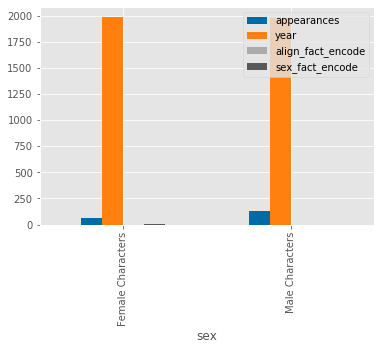

In [45]:
be_bh.groupby('sex').mean().plot(kind='bar');

In [46]:
#how many characters fit that criteria

print(be_bh.shape)
print(df2.shape)
print(4402-269)

(269, 12)
(4402, 12)
4133


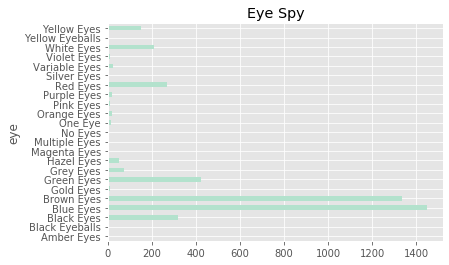

In [47]:
#frequency of eye colors

df2.groupby('eye')['align_fact_encode'].count().plot(kind= 'barh',\
                                                    title= 'Eye Spy', \
                                                    x= 'eye', y= 'align_fact_encode',
                                                    cmap= 'Pastel2');

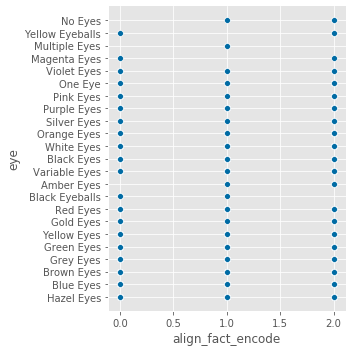

In [48]:
#create a plot to see if every eye color represents all alignments
#remeber 0=good, 1= neutral, 2=bad
sns.relplot(x="align_fact_encode", y="eye", data=df2);

#### From the above plot, we see that:

1.  Eyeless characters are only neutral of bad .
2.  Magenta eyes are good and bad.  (Those sound pretty)
3.  Amber eyes are only neutral or bad.
4.  Black eyes are good or neutral.

In [49]:
#who is/are the magenta eyes charcters?
#use case=false so capitalization doesn't matter

df2[df2['eye'].str.contains('magenta', case=False)] 

,name,id,align,eye,hair,sex,alive,appearances,first_appearance,year,align_fact_encode,sex_fact_encode
1294,Vixen (British Crimelord) (Earth-616),Secret Identity,Bad Characters,Magenta Eyes,Magenta Hair,Female Characters,Living Characters,29.0,Sep-83,1983.0,2,1
1729,Fireflyte (Earth-616),Public Identity,Good Characters,Magenta Eyes,Magenta Hair,Female Characters,Living Characters,21.0,Sep-81,1981.0,0,1


In [50]:
#how many different hair colors and eye colors are there?
#makes sense there aren't any null values

print(df2['eye'].count())
print(df2['hair'].count())

4402
4402


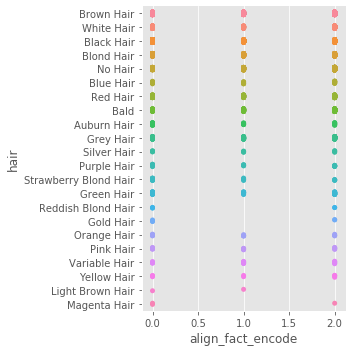

In [51]:
#plotting hair color

sns.catplot(x='align_fact_encode', y='hair', data=df2);

In [52]:
#count of eye color grouped by alignment

pd.DataFrame(df2.groupby('align')['eye'].value_counts())

eye
align              eye                
Bad Characters     Brown Eyes      479
                   Blue Eyes       466
                   Green Eyes      196
                   Red Eyes        168
                   Black Eyes      135
...                                ...
Neutral Characters Black Eyeballs    1
                   Gold Eyes         1
                   No Eyes           1
                   Pink Eyes         1
                   Silver Eyes       1

[62 rows x 1 columns]

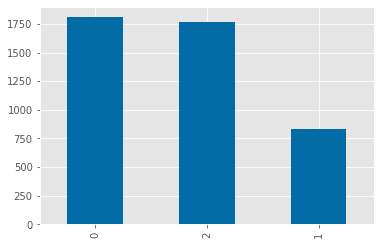

In [53]:
#compare alignment with bar plot

df2.align_fact_encode.value_counts().plot(kind='bar');

In [54]:
#calculate the mean of each eye color

eye_grp = df2.groupby('eye').mean()
eye_grp.drop(['year'], axis = 1)

,appearances,align_fact_encode,sex_fact_encode
eye,,,
Amber Eyes,102.000000,1.750000,0.000000
Black Eyeballs,289.666667,0.333333,0.666667
Black Eyes,14.059937,1.100946,0.255521
Blue Eyes,65.440608,0.826657,0.345304
Brown Eyes,38.152809,0.886891,0.283895
Gold Eyes,125.700000,0.900000,0.200000
Green Eyes,44.566038,1.115566,0.455189
Grey Eyes,59.547945,1.109589,0.246575
Hazel Eyes,145.596154,0.961538,0.192308


## After cleaning the data....

I have decided to work with the "align" feature.  For example, what alignment are you most likely to be in are within certain criteria.

In [55]:
#drop 'first_appearance' column

df2.drop(['first_appearance'], axis = 1)

,name,id,align,eye,hair,sex,alive,appearances,year,align_fact_encode,sex_fact_encode
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,1962.0,0,0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,1941.0,0,0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,1974.0,1,0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,1963.0,0,0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,1950.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15025,Natalie Turner (Earth-616),Public Identity,Good Characters,Black Eyes,Brown Hair,Female Characters,Living Characters,1.0,2013.0,0,1
15026,Non-Newtonian Annie (Legion Personality) (Eart...,Secret Identity,Neutral Characters,Green Eyes,Red Hair,Female Characters,Living Characters,1.0,2013.0,1,1
15027,Pestilence (11th Century) (Earth-616),Secret Identity,Bad Characters,Red Eyes,Bald,Male Characters,Deceased Characters,1.0,2013.0,2,0
15030,Robert Michaud (Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Blond Hair,Male Characters,Deceased Characters,1.0,2013.0,1,0


In [56]:
#want to see how the data is encoded

df2.groupby('align')['align_fact_encode'].max()

align
Bad Characters        2
Good Characters       0
Neutral Characters    1
Name: align_fact_encode, dtype: int64